# Facebook Advertising Analysis
In the world of online advertising, Facebook 

In [ ]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

In [13]:
#Read in data
df=pd.read_csv("/Users/mattthometz/Downloads/KAG_conversion_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
ad_id                  1143 non-null int64
xyz_campaign_id        1143 non-null int64
fb_campaign_id         1143 non-null int64
age                    1143 non-null object
gender                 1143 non-null object
interest               1143 non-null int64
Impressions            1143 non-null int64
Clicks                 1143 non-null int64
Spent                  1143 non-null float64
Total_Conversion       1143 non-null int64
Approved_Conversion    1143 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 98.3+ KB


In [14]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


The data set contains 1,143 observations and 11 variables, with no missing values.  Below are the descriptions for each of the variables provided by the documentation for the data set:

1.) ad_id: an unique ID for each ad.

2.) xyz_campaign_id: an ID associated with each ad campaign of XYZ company.

3.) fb_campaign_id: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.



In [15]:
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

As shown above, the data set contains observations for three unique ad campaigns for company XYZ.  The documentation for the data set does not specify whether these campaigns are for the same product, so initially we will focus on  

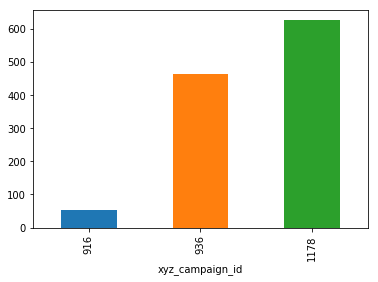

In [30]:
df.groupby('xyz_campaign_id').count()['ad_id'].plot(kind='bar')

In [86]:
def plot_bar_charts(df,x,hue):
    '''plots the counts of observations and their 
        relative proportion in each categorical bin specified by hue '''
    y='proportion'
    figure, axes = plt.subplots(2,1,figsize=(15,15))
    order=list(df[x].unique())
    sns.countplot(x=x,hue=hue,data=df,order=order,ax=axes[0])
    
    proportion=df[x].groupby(df[hue]).value_counts(normalize=True).rename(y).reset_index()
    sns.barplot(x=x, y=y, hue=hue, data=proportion,order=order,ax=axes[1])
    

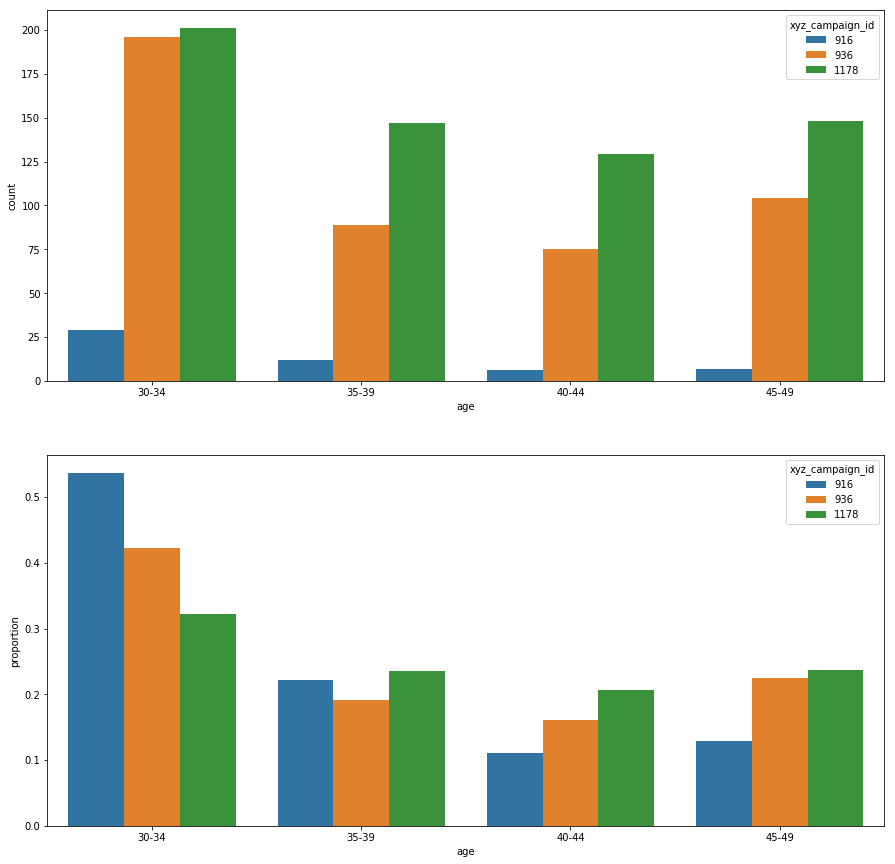

In [87]:
plot_bar_charts(df,'age','xyz_campaign_id')

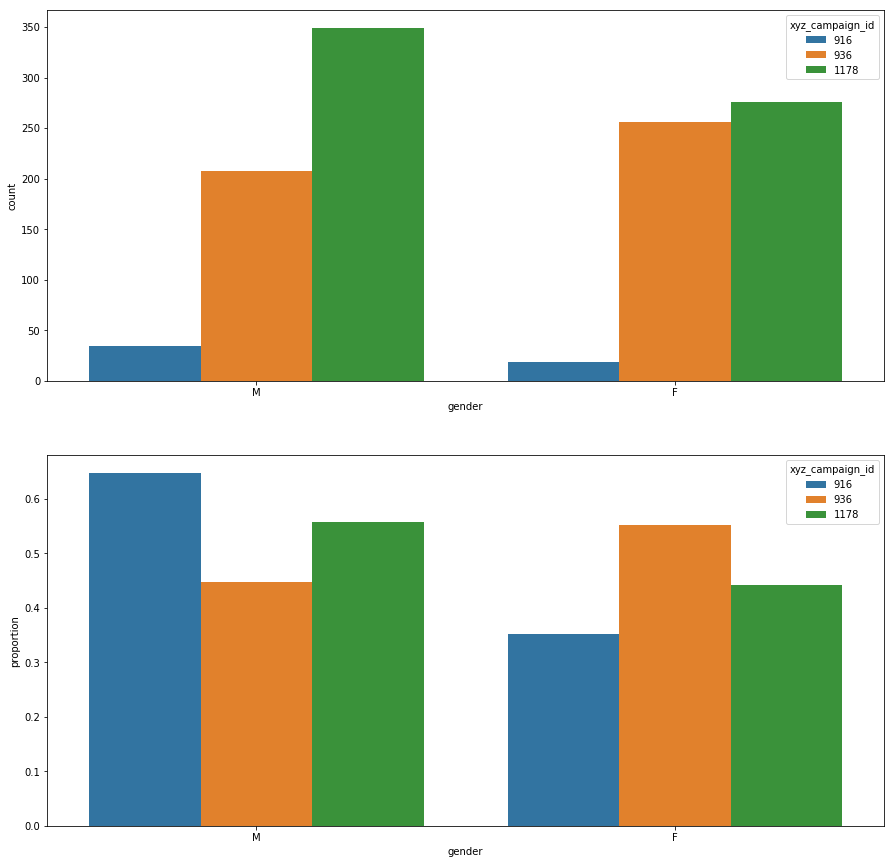

In [89]:
plot_bar_charts(df,'gender','xyz_campaign_id')

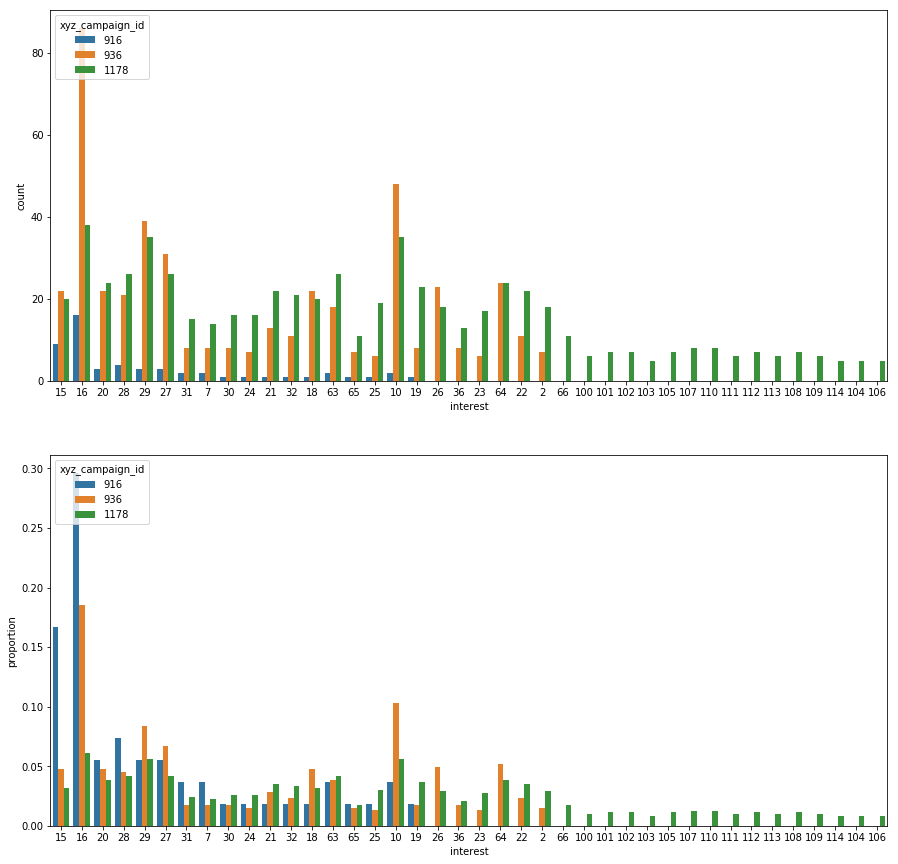

In [90]:
plot_bar_charts(df,'interest','xyz_campaign_id')

/Users/mattthometz/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


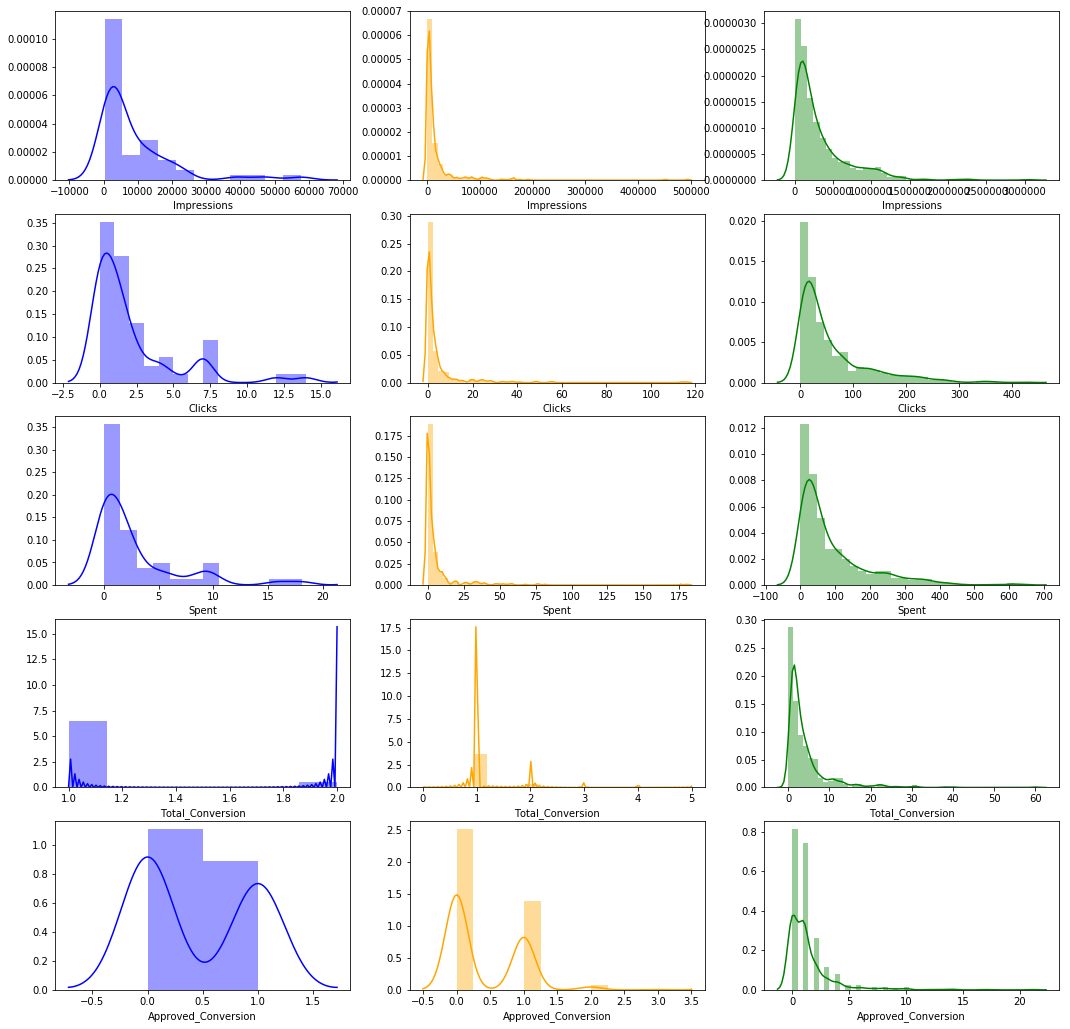

In [127]:

num_col=['Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion']

campaign_id=list((df.xyz_campaign_id.unique()))

#Create dfs for each unique campaign
df_916 = df[df.loc[:,'xyz_campaign_id']==916]
df_936=df[df.loc[:,'xyz_campaign_id']==936]
df_1178 = df[df.loc[:,'xyz_campaign_id']==1178]
figure, axes = plt.subplots(5,3,figsize=(18,18))
ax_count=0
for col in num_col:
    sns.distplot(df_916.loc[:,col],color='blue',norm_hist=True,ax=axes[ax_count,0])
    sns.distplot(df_936.loc[:,col],color='orange',norm_hist=True,ax=axes[ax_count,1])
    sns.distplot(df_1178.loc[:,col],color='green',norm_hist=True,ax=axes[ax_count,2])
    ax_count+=1



In [ ]:
sns.violinplot(x='gender',y='CPM',data=campaign, ax=axes[0],inner='box')
sns.violinplot(x='gender',y='CTR',data=campaign, ax=axes[1], inner='box')
sns.violinplot(x='gender',y='CPC',data=campaign, ax=axes[2], inner='box')
sns.violinplot(x='gender',y='ROAS',data=campaign, ax=axes[2], inner='box')

figure, axes = plt.subplots(ncols=3,figsize=(18,8))
sns.violinplot(x='gender',y='CPM',data=campaign, ax=axes[0],inner='box')
sns.violinplot(x='gender',y='CTR',data=campaign, ax=axes[1], inner='box')
sns.violinplot(x='gender',y='CPC',data=campaign, ax=axes[2], inner='box')
sns.violinplot(x='gender',y='ROAS',data=campaign, ax=axes[2], inner='box')

In [ ]:

outliers_sub=outliers.ix[[i for i,n in outliers['age'].iteritems() if n in reject_age]]
len(outliers_sub)

In [ ]:
alpha=.01
for kpi in ['CPM','CTR','CPC','ROAS']:
    hyp=ranksums(x=campaign[campaign['gender']==0].loc[:,kpi],y=campaign[campaign['gender']==1].loc[:,kpi])
    print("The p-value for ",kpi, 'split by gender:', hyp[1])
    print("Conclusion:", "Reject the null hypothesis" if hyp[1]<alpha else "Fail to reject the null hypothesis")

In [ ]:
np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.2f}'.format}) 
perc_roas=np.percentile(campaign['ROAS'],[25,75])
iqr_roas=perc_roas[1]-perc_roas[0]
#campaign[campaign['ROAS']>(perc_roas[1]+1.5*iqr_roas)]
print(perc_roas)
campaign.ROAS.mean()

In [ ]:
def add_jitter(arr):
    '''Adds jitter to an array'''
    scale = .03*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * scale

y = campaign['ROAS']
X = campaign['age']

#Have to add constant for ordinary least squares model
X_c = sm.add_constant(X)
model = sm.OLS(y,X_c).fit()
print(model.summary())

#Create plots
X_jit=add_jitter(X)
fig, axes = plt.subplots(1,2)
sns.regplot(X,y,ax=axes[0],x_jitter=1,line_kws={'color':'black'})
sns.residplot(X_jit, y, lowess=True,color="g",line_kws={'color':'black'},ax=axes[1])

In [ ]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    plt.figure(figsize=(15,10))
    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

def plot_bar_charts(df,x,hue):
    '''plots the counts of observations and their 
        percent diff of over the population in each categorical bin specified by hue '''
    y='scaled'

    
    figure, axes = plt.subplots(2,1,figsize=(10,10))
    order=list(df[x].unique())
    sns.countplot(x=x,hue=hue,data=df,order=order,ax=axes[0])
    
    total_proportion = df[x].value_counts(normalize=True)
    total_hue=df[hue].value_counts()
    proportion=df.groupby(hue)[x].value_counts(normalize=True).rename('x_prop').reset_index()
    
    x_unique=proportion[x].unique()
    prop_map={}
    for x_u in x_unique:
        prop_map[x_u]=total_proportion[x_u]
    
    hue_map={}
    hue_unique=df[hue].unique()
    for h_u in hue_unique:
        hue_map[h_u]=total_hue[h_u]

    proportion['total_prop']=proportion[x].map(prop_map)
    proportion['total_hue']=proportion[hue].map(hue_map)
    proportion['percent_diff']=(proportion['x_prop']-proportion['total_prop'])/proportion['total_prop']*100
    proportion['scaled']=proportion['percent_diff']*proportion['total_hue']/len(df)
    sns.barplot(x=x, y=y, hue=hue, data=proportion,order=order,ax=axes[1])
    

In [ ]:
#Drop uninformative columns
campaign_clust=campaign.drop(columns=['ad_id','fb_campaign_id'])

#Reindex so we can know column index
campaign_clust=campaign_clust.reindex(['gender','interest','age',
                                     'Impressions',
       'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion', 'CPM',
       'CTR', 'CR_Approved', 'CR_Total', 'CPC', 'ROAS'],axis=1)


#Scale non-categorical values
scaler=RobustScaler()
num_scaled=scaler.fit_transform(campaign_clust.iloc[:,3:])
num_scaled=pd.DataFrame(num_scaled,columns=list(campaign_clust)[3:],index=campaign_clust.index)
clust_scaled=pd.concat([campaign_clust[['gender','interest','age']],num_scaled],axis=1)

#onehot encode categorical features
onehot_encoder = OneHotEncoder(categorical_features=[0,1],sparse=False)
onehot_encoded = onehot_encoder.fit_transform(clust_scaled)

linked_array = ward(num_scaled)

fancy_dendrogram(
    linked_array,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=39
)

plt.show()

max_d=39
linked_array = ward(num_scaled)
clusters = fcluster(linked_array, max_d, criterion='distance')
campaign_clust['cluster'] = clusters
num_scaled['cluster'] = clusters
print(num_scaled.groupby('cluster').count().iloc[:,0])
num_scaled.groupby('cluster').mean()

In [ ]:
plot_bar_charts(campaign_clust,'gender','cluster')

In [ ]:
plot_bar_charts(campaign_clust,'age','cluster')